# 1 Dimensional FDM for Longitudinal Vibrations

## A code for ME F319 Vibrations Project

The equation of motion of a beam undergoing longitudinal vibrations is given by the following formula (Volterra, p. 310):

$\frac{c\partial v(x,t)}{\partial t}+EI\frac{\partial^4v(x,t)}{\partial x^4}= -\lambda_m\frac{\partial^2v(x,t)}{\partial t^2}$

where $v$ is the displacement in the longitudinal direction, $E$ is the young's modulus, $I$ is the bending moment of inertia, $c$ is the damping coefficient and $\lambda_m$ is the mass per unit length.

In the finite differences formulation, considering a single node, with a central difference derivative as  we can write $\frac{\partial^4v(x,t)}{\partial x^4}$ as: 

$\frac{\partial^4v(x,t)}{\partial x^4} = \frac{v(x+2h)−4\cdot v(x+h)+6\cdot v(x)−4\cdot v(x−h)+v(x−2h)}{h^4}$

Assuming that v(x) corresponds to the $i^{th}$ node in space and $j^{th}$ node in time, we get the result of the following: 

$\frac{\partial^4v_{i,j}}{\partial x^4} = \frac{v_{i+2,j}−4 v_{i+1,j}+6 v_{i,j}-  4v_{i-1,j}+v_{i-2,j}}{l^4}$

where $l$ is the length of an element, and $t$ is the timestep. For simplicity's sake, we shall assume a structured grid for this problem. For the time derivative, we shall assume a backward difference, as we assume that the vibrations are dependent only on the time history of the beam, and not all points in time. The LHS time derivative becomes the following:

$\frac{c\partial v(x,t)}{\partial t} = c \frac{v_{i,j-2}−2 v_{i,j-1}+ v_{i,j}}{t^2}$

Thus, the RHS of the equation then becomes, with the same convention as before:

$\frac{\partial^2v_{i,j}}{\partial t^2} = \frac{v_{i,j-2}−2 v_{i,j-1}+ v_{i,j}}{t^2}$

Equating the RHS and LHS of the given equations, we get the following overall equation:

$EI\frac{v_{i+2,j}−4 v_{i+1,j}+6 v_{i,j}-  4v_{i-1,j}+v_{i-2,j}}{l^4} = -\lambda_m\frac{v_{i,j-2}−2 v_{i,j-1}+ v_{i,j}}{t^2} - c \frac{v_{i,j-2}−2 v_{i,j-1}+ v_{i,j}}{t^2} $ (or)

${v_{i+2,j}−4 v_{i+1,j}+6 v_{i,j}-  4v_{i-1,j}+v_{i-2,j}} = -\frac{\lambda_m{l^4}}{{EI}}\frac{v_{i,j-2}−2 v_{i,j-1}+ v_{i,j}}{t^2} - \frac{c{l^4}}{EI} \frac{v_{i,j-2}−2 v_{i,j-1}+ v_{i,j}}{t^2} $ (or)

putting $\frac{\lambda_m{l^4}}{{EI}}$ as $a$, and $\frac{c{l^4}}{EI}$ as $b$,

${v_{i+2,j}−4 v_{i+1,j}+6 v_{i,j}-  4v_{i-1,j}+v_{i-2,j}} = -a\frac{v_{i,j-2}−2 v_{i,j-1}+ v_{i,j}}{t^2} - b \frac{v_{i,j-2}−2 v_{i,j-1}+ v_{i,j}}{t^2} $ (or)

${v_{i+2,j}−4 v_{i+1,j}+6 v_{i,j}-  4v_{i-1,j}+v_{i-2,j}} = -a\frac{v_{i,j-2}}{t^2}+2a \frac{ v_{i,j-1}}{t^2}- a \frac{v_{i,j}}{t^2} -  b \frac{v_{i,j-2}}{t^2}+ 2b \frac{v_{i,j-1}}{t^2} - b \frac{v_{i,j}}{t^2}$ (or)

$6 v_{i,j}+ a \frac{v_{i,j}}{t^2}+ b \frac{v_{i,j}}{t^2} = -a\frac{v_{i,j-2}}{t^2}+2a \frac{ v_{i,j-1}}{t^2} -  b \frac{v_{i,j-2}}{t^2}+ 2b \frac{v_{i,j-1}}{t^2}  - v_{i+2,j} +4 v_{i+1,j}+  4v_{i-1,j} -v_{i-2,j}$ (or)

$v_{i,j}= \frac{-a\frac{v_{i,j-2}}{t^2}+2a \frac{ v_{i,j-1}}{t^2} -  b \frac{v_{i,j-2}}{t^2}+ 2b \frac{v_{i,j-1}}{t^2}  - v_{i+2,j} +4 v_{i+1,j}+  4v_{i-1,j} -v_{i-2,j}}{6+\frac{a}{t^2} +\frac{b}{t^2}}$ 


This last equation is the explicit form of the nodal value $ v_{i,j} $, which allows us to directy find the displacement for any node at position $i$ at time instant $j$. Now we are ready to begin our one dimensional vibration FDM model.


In [1986]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
#import libraries

In [2017]:


############## SIM PARAMETERS ####################

n_e = 5 #number of elements

l = l_t/n_e #elemental size

tstep = 0.000001 #timestep size

total_t = 1 #total time


##################################################


############# BEAM PARAMETERS ####################

l_t = 1 #total length of the beam in metres



E = np.zeros(n_e) #young's modulus

natural_flag = 1

set_c = 0.1

if natural_flag == 1:
    c = 0.011*(I**0.584)
else:
    c = set_c

i = 0

while i < n_e: ##set the young's modulus
    if i < n_e/2:
        
        E[i] += 2E10
        
    else:
        
        E[i] += 2E10
        
    i+=1

#we shall assume a rectangular cross section beam.

br = 0.05 #breadth of the beam in meters
h = 0.05 #height of the beam in meters

I = br*h**3/12 #moment of inertia of the beam

density = 7500 # volumetric density of the beam

lambda_m = density*br*h #linear density of the beam
i = 0

a = np.zeros(n_e)

b = np.zeros(n_e)

while i < n_e:

    
    a[i] = a[i] + (lambda_m*l**4)/(E[i]*I) #a as calculated earlier
    
    b[i] = b[i] + (c*l**4)/(E[i]*I) #b as calculated earlier

    i += 1
##################################################




############# DATA PARAMETERS ####################

interested_node_index = int(n_e/2) #the node at which we are extracting the data

data = np.zeros(int(total_t/tstep)) #the data storage variable

t_array = np.arange(0,total_t-tstep,tstep, dtype = "float") #the array to store all the timesteps for plotting later

##################################################



######## BOUNDARY & INITIAL CONDITIONS ###########

fixed_node_index = [0] #all fixed nodes

initial_d = 0.2 #initial displacement

displaced_node_index = [n_e-1] #the displaced node

##################################################


########## FORCING FUNCTION PARAMETERS ###########

force_flag = 1

forcing_node = int(n_e-1)

force_type = 1 #type of force, 1 is harmonic, 2 is constant

frequency = 100 #frequency of forcing function in hertz

max_force = 10

equi_disp = max_force/(E[forcing_node]*I)

omega = 2*3.14*frequency

stop_force_flag = 0

stop_force_t = 0.5

if stop_force_flag == 0:
    stop_force_t = total_t + 1

##################################################



In [2018]:
#generate solution domain

v_cur = np.zeros(n_e) #displacements at current time
v_bef = np.zeros(n_e) #displacements at one timestep before
v_bbef = np.zeros(n_e) #displacements at two timesteps before

v_cur[int(n_e/2):n_e-1] = v_cur[int(n_e/2):n_e-1] + initial_d #give the beam the initial displacement


t = 0 #current time


In [2019]:
n = 0 #index for data
while t <= total_t:
    i = 0
    if total_t/(t+0.0000001) - int(total_t/(t+0.0000001)) <= tstep*20:
        print(t)
        if total_t - t > tstep:
            clear_output(wait=True)

    if force_flag == 1: #give a force for the system
        if t <= stop_force_t:
            if force_type == 1: #harmonic force
                v_cur[forcing_node] = v_cur[forcing_node] + equi_disp*np.sin(omega*t)
                
            if force_type == 2: #constant force, set time small for impulse
                v_cur[forcing_node] = v_cur[forcing_node] + equi_disp 
                
        
       
    while i < n_e: #update the displacements

        if i not in fixed_node_index:
            if i <= 1:
                v_cur[i] = ((-(a[i]/(tstep**2)))*(v_bbef[i] - 2*v_bef[i]) + (-(b[i]/(tstep**2)))*(v_bbef[i] - 2*v_bef[i]) - v_cur[i+2] + 4*v_cur[i+1])/(6+((a[i]/(tstep**2))+((b[i]/(tstep**2)))))
            elif i <= 2:
                v_cur[i] = ((-(a[i]/(tstep**2)))*(v_bbef[i] - 2*v_bef[i]) + (-(b[i]/(tstep**2)))*(v_bbef[i] - 2*v_bef[i]) - v_cur[i+2] + 4*v_cur[i+1] + 4*v_cur[i-1])/(6+((a[i]/(tstep**2))+((b[i]/(tstep**2)))))
            elif i >= n_e - 1:
                v_cur[i] = ((-(a[i]/(tstep**2)))*(v_bbef[i] - 2*v_bef[i]) + (-(b[i]/(tstep**2)))*(v_bbef[i] - 2*v_bef[i]) + 4*v_cur[i-1] - v_cur[i-2])/(6+((a[i]/(tstep**2))+((b[i]/(tstep**2)))))
            elif i >= n_e - 2:
                v_cur[i] = ((-(a[i]/(tstep**2)))*(v_bbef[i] - 2*v_bef[i]) + (-(b[i]/(tstep**2)))*(v_bbef[i] - 2*v_bef[i]) + 4*v_cur[i+1] + 4*v_cur[i-1] - v_cur[i-2])/(6+((a[i]/(tstep**2))+((b[i]/(tstep**2)))))
            else:
                v_cur[i] = ((-(a[i]/(tstep**2)))*(v_bbef[i] - 2*v_bef[i]) + (-(b[i]/(tstep**2)))*(v_bbef[i] - 2*v_bef[i]) - v_cur[i+2] + 4*v_cur[i+1] + 4*v_cur[i-1] - v_cur[i-2])/(6+((a[i]/(tstep**2))+((b[i]/(tstep**2)))))

        i += 1
    v_bbef = v_bef[:] #copy v_bef to v_bbef
    v_bef = v_cur[:] #copy v_cur to v_bef
    if n < len(data):
        data[n] = max(v_cur)
    n += 1
    t += tstep

0.9999990000079182


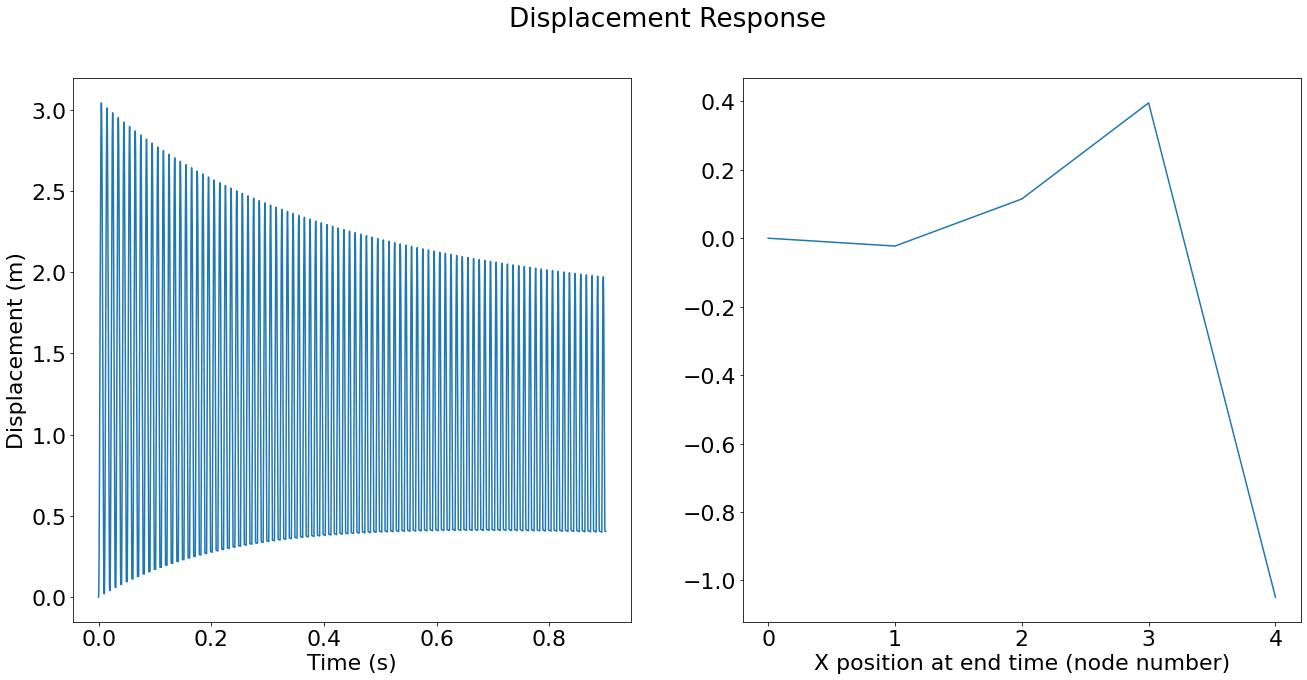

In [2020]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = False)
plt.rcParams['figure.figsize'] = [22, 10]
plt.rcParams.update({'font.size': 22})
plt.rc('axes', labelsize=22)
fig.suptitle("Displacement Response")
ax1.set_ylabel("Displacement (m)")
ax1.set_xlabel("Time (s)")
ax1.plot(t_array[1:900000],data[1:900000])
ax2.set_xlabel("X position at end time (node number)")
ax2.plot(np.arange(0,n_e,1, dtype = "int"),v_cur)

